###  AIM

To build a Simple Linear Regression model to study the linear relationship between Sales and Advertising dataset for a dietary weight control product.

### Dataset

The data set has been imported from the econometrics website with the following url:-

http://www.econometrics.com/intro/sales.htm

This data set contains Sales and Advertising expenditures for a dietary weight control product. It contains monthly data for 36 months. The variables in this data set are Sales and Advertising.

In [34]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Import the data
df = pd.read_csv('SALES.txt', header=None, delim_whitespace=True)
# delim_whitespace=True : This tells pandas to treat any sequence of whitespace (spaces or tabs) as a delimiter.

### EDA

In [42]:
df.head()

,0,1
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [43]:
df.shape

(36, 2)

In [44]:
df.columns

Index([0, 1], dtype='int64')

In [52]:
# Rename columns of df dataframe

df.columns = ['Sales', 'Advertising']

In [46]:
df.head()

,Sales,Advertising
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes


In [54]:
df.describe()

,Sales,Advertising
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


In [55]:
# Declare feature variable and target variable

X = df['Sales'].values
y = df['Advertising'].values

# Sales and Advertising data values are given by X and y respectively.

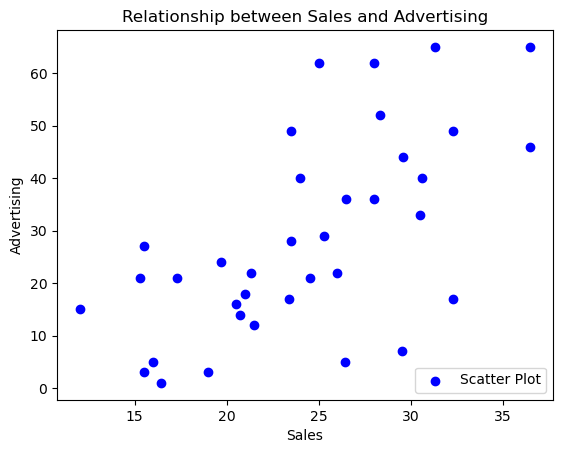

In [57]:
# Plot scatter plot between X and y

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

In [ ]:
# Print the dimensions of X and y

print(X.shape)
print(y.shape)

Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

It specifies first dimension to be -1, which means "unspecified".

Machine learning models typically expect X (features) to be a 2D array with dimensions (n_samples, n_features), where:
* n_samples is the number of samples (rows).
* n_features is the number of features (columns).

In [59]:
# Reshape X and y

X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [60]:
# Print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)

(36, 1)
(36, 1)


In [61]:
# Split X and y into training and test data sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
# Print the dimensions of X_train,X_test,y_train,y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


### Fit the model

In [63]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


In [68]:
# Predict on the test data
y_pred=lm.predict(X_test)

In [65]:
# Compute model slope and intercept

print("Estimated model slope, a:" , lm.coef_)
print("Estimated model intercept, b:" ,lm.intercept_) 

Estimated model slope, a: [[1.60509347]]
Estimated model intercept, b: [-11.16003616]


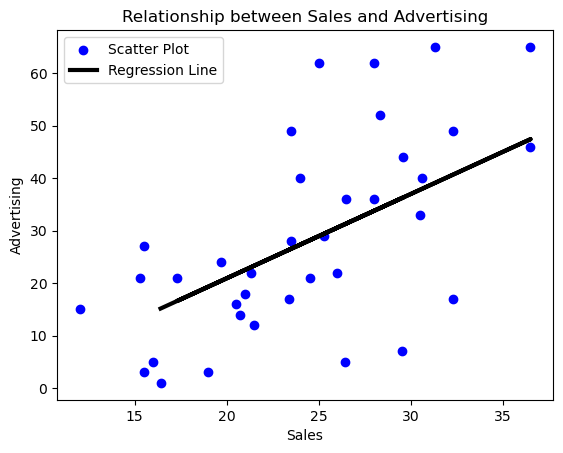

In [78]:
# Plot the Regression Line


plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=2)
plt.show()

### Make prediction

In [69]:
# Predicting Advertising values

lm.predict(X)[0:5]

# Predicting Advertising values on first five Sales values.

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

In [72]:
# To make an individual prediction using the linear regression model.

print(str(lm.predict([[24]])))

[[27.36220717]]


### Model Perfomance matrics

In [73]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 11.2273


In [74]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.5789


### Conclusion and Interpretation

* Sales range is low (e.g., 0 to 50): An RMSE of 11.23 indicates significant error, suggesting the model may not be very reliable for accurate predictions.
* if R2 score value >= 0.7, then the model is good enough ,if R2 score value < 0.7, then the model is not good enough . Our R2 score value has been found to be .5789. It means that this model explains 57.89 % of the variance in our dependent variable. So, the R2 score value confirms that the model is not good enough